In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

          B1        A1
3   0.440000  0.110454
4   0.440000  0.110680
5   0.437521  0.110680
6   0.437521  0.109772
7   0.437493  0.110114
8   0.437464  0.111131
9   0.437493  0.110680
10  0.437493  0.110000
           B1        A1
1    0.440000  0.107935
2    0.437464  0.107121
3    0.440000  0.110454
4    0.440000  0.110680
5    0.437521  0.110680
..        ...       ...
115  3.056640  1.256463
116  3.056722  1.372999
117  3.056804  1.367507
118  3.056657  1.370611
119  3.056677  1.369014

[119 rows x 2 columns]


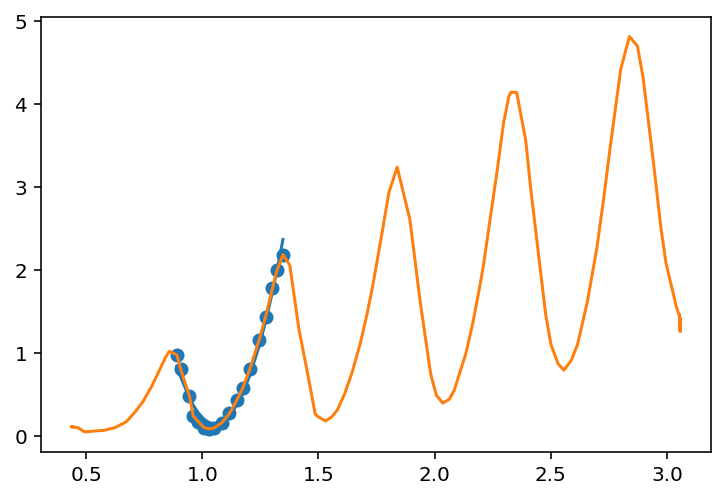

In [41]:


y = pd.read_csv('p9.csv',
                usecols=[4],
               names = ['A1'])
x = pd.read_csv('p9.csv',
                usecols=[3],
                names = ['B1'])

y = y.iloc[1: , :]
x = x.iloc[1: , :]
ser = pd.Series(y['A1'])
y = pd.to_numeric(ser)

ser = pd.Series(x['B1'])
x = pd.to_numeric(ser)

data = pd.concat([x, y], axis = 1)

#plt.scatter(data.B1, data.A1)

print(data.iloc[2:10, :])

print(data)

newdata = data.iloc[30:48, : ]

plt.scatter(newdata.B1, newdata.A1)

p = [1, 2, 3]
p = np.polyfit(newdata.B1, newdata.A1, 2)

ypoly = poly(p[0], p[1], p[2], newdata.B1)

plt.plot(newdata.B1, ypoly)
plt.plot(x,y)

In [42]:
xmax = np.zeros(int(data.size/2) + 1)
ymax = np.zeros(int(data.size/2) + 1)

In [43]:
def max(y):
    for i in range(2, int(data.size/2)):
        if y[i]>y[i+1] and y[i]>y[i-1]:
            ymax[i] = y[i]
            print(i)
    print(ymax)

In [44]:
max(y)

8
12
15
30
48
65
81
97
106
108
113
116
118
[0.         0.         0.         0.         0.         0.
 0.         0.         0.11113055 0.         0.         0.
 0.11067972 0.         0.         0.10977249 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.01990196 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.18537754 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         3.23969906
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.14176895 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

In [45]:
print(data.loc[np.where(ymax == 1.01990196)])

Empty DataFrame
Columns: [B1, A1]
Index: []


In [46]:
ymax[ymax>1]

array([1.01990196, 2.18537754, 3.23969906, 4.14176895, 4.81455086,
       1.41372734, 1.46225853, 1.3885424 , 1.37299854, 1.37061118])

In [47]:
xmax[xmax>0.001]

array([], dtype=float64)

In [48]:
def poly(a, b, c, x):
    return a*(x**2) + b*x + c

In [49]:
mi = -p[1]/(2*p[0])
print(mi)
print(poly(p[0],p[1],p[2],mi))

1.0546242250762605
0.14207145313777048


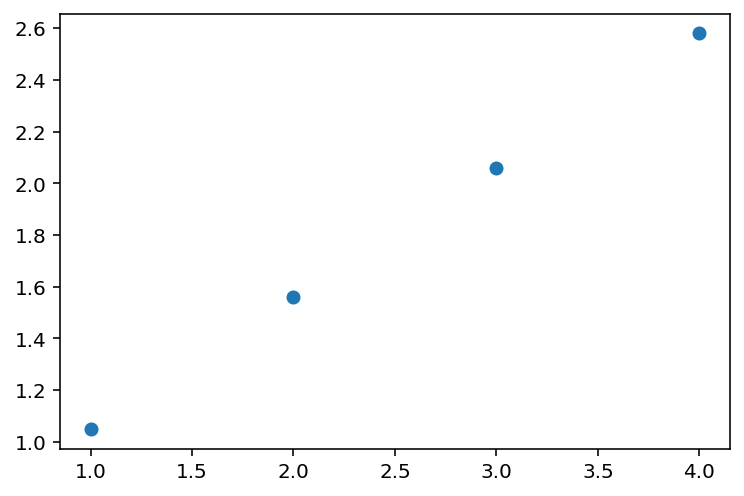

In [39]:
#T=168
n = [1,2,3,4]
u = [1.05,1.56, 2.06,2.58]
plt.scatter(n,u)
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept 
popt, pcov = curve_fit(line,n,u)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [40]:
slope

0.5089999999989292

In [10]:
err_slope

0.0026457513667236024